In [1]:
#PyTorch Workflow
import torch

In [2]:
from torch import nn # nn contains PyTorch's building blocks for neural network
import matplotlib.pyplot as plt

# Check PyTorch Version
torch.__version__

'2.5.1+cu121'

## Data (Preparing and Loading)
 ## Data can be anything in machine learning.
 * Excell spreadsheet
 * Images of any kind
 * Videos (YouTube has lots of data...)
 * Audio
 * Text

 ## Machine learning a game of two parts
 * Create some form of numerical encoding from inout
 * Build a machine learning model to find pattern in data


In [3]:
# Creating a data using linear regression
# Using linear regression formula to make a straight line with known parameters

In [4]:
# create known parameteres
weight = 0.7
bias = 0.3


# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias
X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

#Splitting Data into trainning,validation and test set
creating the trainning set with our data

In [5]:
# Create a test , train  split
train_split = int(0.8 * len(X))
X_train,Y_train = X[:train_split], Y[:train_split]
X_test,Y_test = X[train_split:], Y[train_split:]
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [6]:
# Visualize data using matplotlib
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))
  # Plot trainning data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label = "Trainng data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label = "Test data")

  #Are there Predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")

  #Show the legend
  plt.legend(prop={"size":14})

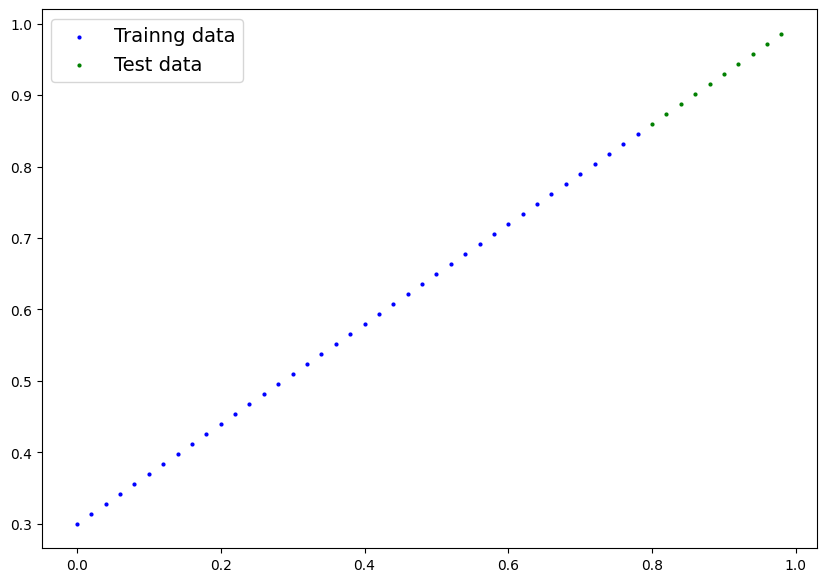

In [7]:
plot_predictions()

In [8]:
#Creating PyTorch Model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    #Initialize the model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

### Checking the contents of our pytorch model


In [9]:
#Create a random seed
torch.manual_seed(42)

#create the instance of linear regression model
model_0 =LinearRegressionModel()

#Check the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
#Model parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
print(model_0.forward(X_train[12]))

tensor([0.2096], grad_fn=<AddBackward0>)


In [12]:
#Make Presictions eith model
with torch.inference_mode():
  y_preds = model_0(X_test)

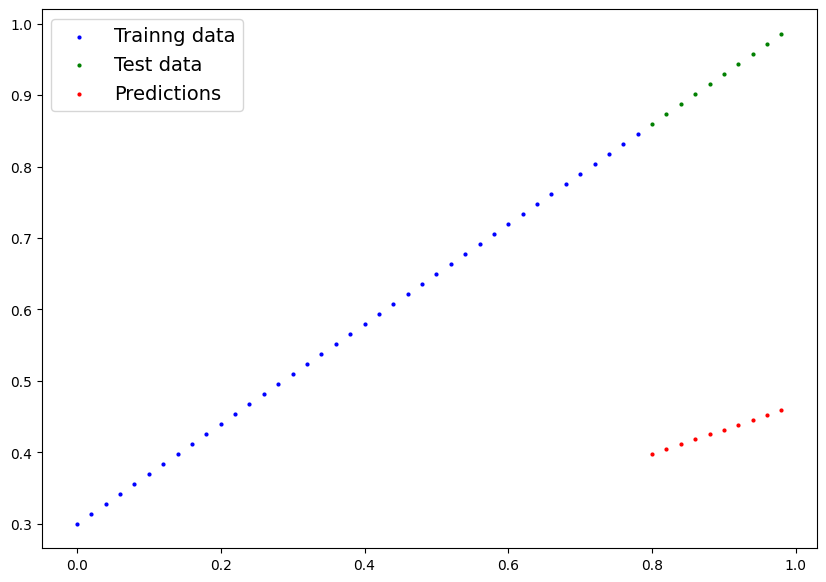

In [13]:
plot_predictions(predictions = y_preds)

## 3. Train the model
The whole idea of trainning is for model to move from some *unknown* parameters to some known parameters


In [14]:
#Setup a loss finction
loss_fn = nn.L1Loss()



#setup an optmizer
optmizer = torch.optim.SGD(params = model_0.parameters(),
                           lr = 0.01)

## Building Pytorch trainning and testing loop

In [19]:
epoches = 100
# Loop theough the data
for epoch in range(epoches):
  model_0.train()

  #1.forward pass
  y_preds = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_preds, Y_train)
  #3. Optmizer zero grad
  optmizer.zero_grad()

  #4. Perfrom backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. Progress/Step the optmizer(gradient decent)
  optmizer.step()

  #Testing code
  model_0.eval()
  with torch.inference_mode():#turns off gradient in our model
    test_preds = model_0(X_test)
    test_loss = loss_fn(test_preds, Y_test)
  #Print test loss and validatio loss
  if epoch % 10 == 0:
    print(f"Epoch:{epoch}, Loss:{loss}, Test Loss:{test_loss}")

Epoch:0, Loss:0.024458957836031914, Test Loss:0.05646304413676262
Epoch:10, Loss:0.021020207554101944, Test Loss:0.04819049686193466
Epoch:20, Loss:0.01758546568453312, Test Loss:0.04060482233762741
Epoch:30, Loss:0.014155393466353416, Test Loss:0.03233227878808975
Epoch:40, Loss:0.010716589167714119, Test Loss:0.024059748277068138
Epoch:50, Loss:0.0072835334576666355, Test Loss:0.016474086791276932
Epoch:60, Loss:0.0038517764769494534, Test Loss:0.008201557211577892
Epoch:70, Loss:0.008932482451200485, Test Loss:0.005023092031478882
Epoch:80, Loss:0.008932482451200485, Test Loss:0.005023092031478882
Epoch:90, Loss:0.008932482451200485, Test Loss:0.005023092031478882


In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [21]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

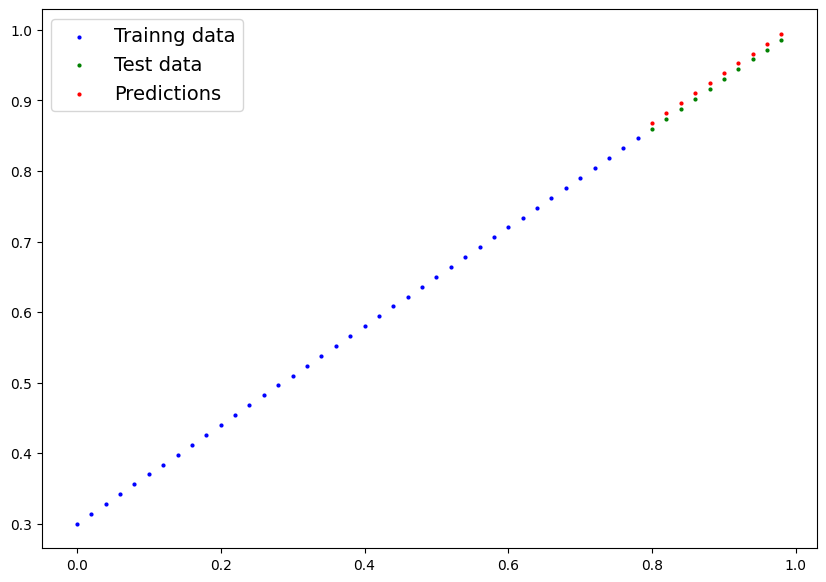

In [22]:
plot_predictions(predictions = y_preds_new)

## Saving model in Pytorch
There are three main methods ..
* torch.save() -> allows to to save PyTorch object in Python's pickle format
* torch.load()-> allows you load a saved PyTroch object

In [27]:
#Saving Our PyTorch model
from pathlib  import Path

# 1. Crearte models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_save_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model statedict
torch.save(model_0.state_dict(), MODEL_save_PATH)

In [28]:
!ls -l models


total 4
-rw-r--r-- 1 root root 1668 Nov 19 09:18 01_pytorch_workflow_model.pth


#Loading a pytorch model
* since we saved a 'state_dict'rather than the entire model . we'll create a new knstance of our model and load the saved state_dict() into that

In [29]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [30]:
loaded_model_0 = LinearRegressionModel()

#Load the saved state_dicr of model_0
loaded_model_0.load_state_dict(torch.load(MODEL_save_PATH))

<ipython-input-30-274071681a3d>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(MODEL_save_PATH))


<All keys matched successfully>

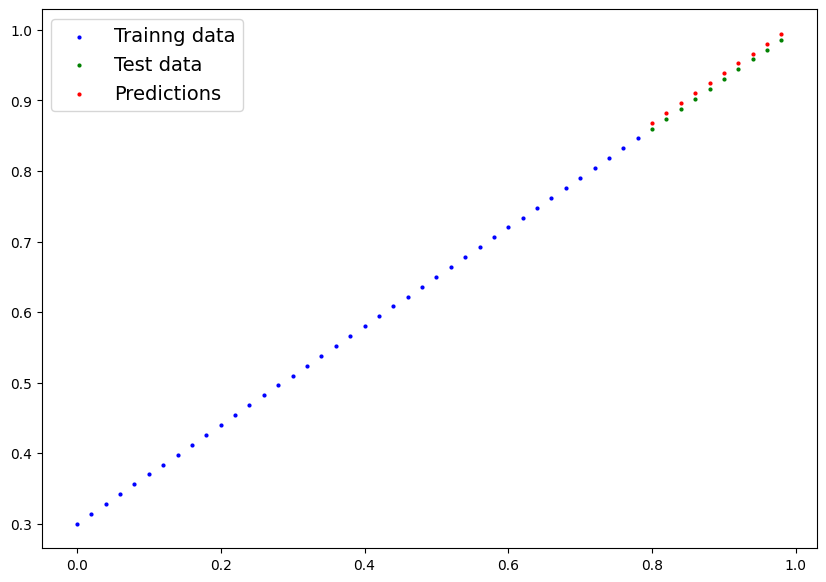

In [33]:
with torch.inference_mode():
  y_preds_new = loaded_model_0(X_test)
plot_predictions(predictions = y_preds_new)